In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/DATASETS/Dataset_2.csv", encoding=('ISO-8859-1'),low_memory=False)
df.head()

,text,polarity
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
df = df.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(df['text'].value_counts(0))
df

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                    11
25-04-18                                                                                                                                          4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦      4
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÃÂ                                                                                3
[Zicutake] Depression can be prevented by exercise  https://goo.gl/fb/Mu7k6tÃÂ                                                                   3
                                                                                                                                                 ..
@FRin323 none of that!! I can't wait!!!  so when the big day???                                                 

,text,polarity
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [ ]:
EPOCH = 10

split_val = int(0.2 * df.shape[0])

dataTest = df.iloc[-split_val :]
dataVal = df.iloc[- 2 * split_val : -split_val]
dataTrain = df.iloc[: - 2 * split_val]

In [ ]:
print(dataTrain['text'].value_counts())

dataTrain

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                                              9
How exercising can slash the risk of depression  https://nyp.st/2vGw2KqÃÂ  via @nypost                                                                                    2
Sleeping next to someone you love not only reduces depression, but it also helps you to live longer and makes you fall asleep faster.                                      2
#NAME?                                                                                                                                                                     2
Don't settle with #depression, #anxiety or defeat. #Jesus wants you to overcome. #faith #Prayer #bible #kalamazoo http://www.vwcenter.org/fervent-prayer.htmlÃÂ Ã¢ÂÂ¦    2
                                                                                                                                       

,text,polarity
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [ ]:
print(dataVal['text'].value_counts())

dataVal

The Stock Market Is Having its Worst Second Quarter Since the Great Depression  http://fortune.com/2018/04/02/stock-market-nyse-worst-second-quarter-depression/ÃÂ Ã¢ÂÂ¦    2
good luck nlang sa iv-e... hahahaha.. bago toh.. ngaion lang aq lilipat ng classroom... MEANT to be talaga kme... hahahahah..                                                 1
I can't go to sleep... so so SO hyper! lol                                                                                                                                    1
@gaycyclops because I was thinking of joining you for a marathon sometime this summer... School's out in 13 days!!!                                                           1
@BriggySmalls happy to be the 1st to *high five* you dude!                                                                                                                    1
                                                                                                                        

,text,polarity
6190,"@pilucha ok, no more drinking away of the sorr...",0
6191,Earl's wearing a tie,0
6192,Loving @gilesbennet teaching style - like Dr S...,0
6193,hangin with ledd nd court.,0
6194,under 24 hours left to vote for @protagonize a...,0
...,...,...
8247,Look at the cute hat I got today...I look scar...,0
8248,@firesty hey ya )) like ur new pic i have one...,0
8249,@Styla73 Thank you.,0
8250,@stephjonesmusic http://twitpic.com/6bclz - ah...,0


In [ ]:

print(dataTest['text'].value_counts())

dataTest

More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦                                                                                                                                        2
Lonely millennials twice as likely to experience depression or anxiety, finds study  http://www.independent.co.uk/life-style/millennials-lonely-depression-anxiety-mental-health-odds-doubling-unemployed-study-a8319686.htmlÃÂ Ã¢ÂÂ¦                                             2
Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                                                                                                                                                       2
@Rotae Sent you an LJ PM with some shinies                                                                                                                            

,text,polarity
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [ ]:

trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])


In [ ]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2072576   
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         394240    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 512)         1574912   
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 64)          147712    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 2336      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,191,785
Trainable params: 4,191,785
Non-trainable params: 0
______________________________________________

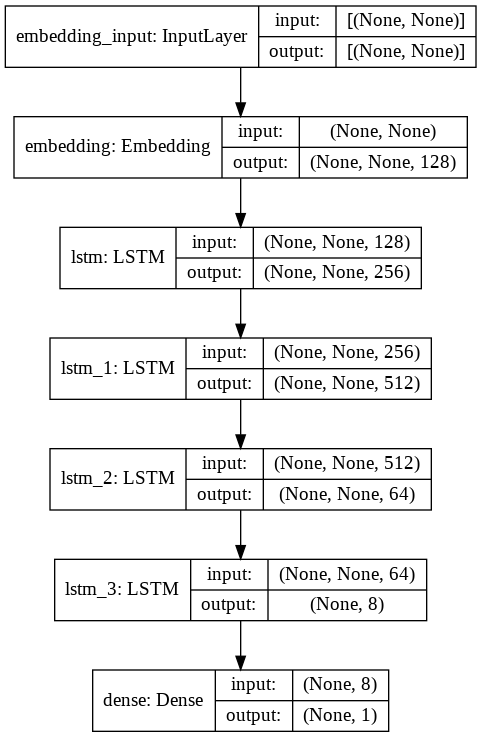

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.LSTM(256, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(512, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(64, return_sequences = True, dropout = 0.2))
model.add(layers.LSTM(8, dropout = 0.2))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)



Epoch 1/10
194/194 [==============================] - 430s 2s/step - loss: 0.2999 - accuracy: 0.8775 - val_loss: 0.0594 - val_accuracy: 0.9922
Epoch 2/10
194/194 [==============================] - 424s 2s/step - loss: 0.5002 - accuracy: 0.7767 - val_loss: 0.5516 - val_accuracy: 0.7789
Epoch 3/10
194/194 [==============================] - 415s 2s/step - loss: 0.5393 - accuracy: 0.7729 - val_loss: 0.5284 - val_accuracy: 0.7789
Epoch 4/10
194/194 [==============================] - 412s 2s/step - loss: 0.5362 - accuracy: 0.7729 - val_loss: 0.5286 - val_accuracy: 0.7789
Epoch 5/10
194/194 [==============================] - 417s 2s/step - loss: 0.5359 - accuracy: 0.7729 - val_loss: 0.5282 - val_accuracy: 0.7789
Epoch 6/10
194/194 [==============================] - 414s 2s/step - loss: 0.5016 - accuracy: 0.7835 - val_loss: 0.1093 - val_accuracy: 0.9927
Epoch 7/10
194/194 [==============================] - 415s 2s/step - loss: 0.0461 - accuracy: 0.9952 - val_loss: 0.0507 - val_accuracy: 0.9898

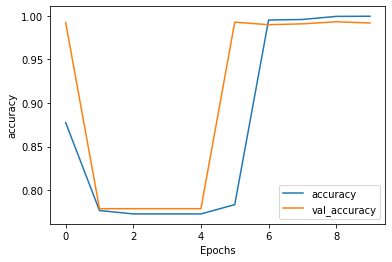

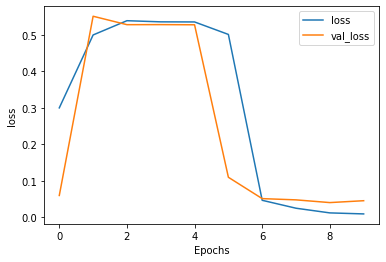


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.877544 	   0.299948 	   0.992241 	   0.059377
       2   0.776737 	   0.500206 	   0.778856 	   0.551595
       3   0.772859 	   0.539348 	   0.778856 	   0.528441
       4   0.772859 	   0.536213 	   0.778856 	   0.528591
       5   0.772859 	   0.535935 	   0.778856 	   0.528155
       6   0.783522 	   0.501633 	   0.992725 	   0.109333
       7   0.995153 	   0.046096 	   0.989816 	   0.050707
       8   0.995800 	   0.024339 	   0.990786 	   0.047288
       9   0.999354 	   0.011504 	   0.993210 	   0.039814
      10   0.999515 	   0.008703 	   0.991756 	   0.044972


In [ ]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 72s 366ms/step - loss: 0.0078 - accuracy: 0.9995
Train Loss: 0.0077921864576637745
Train Accuracy: 0.9995153546333313 (Model Metric)
Train Accuracy: 0.9995153473344104 (sklearn Metric)
Train Precision: 1.0
Train Recall: 0.9978662873399715
Train F1-score: 0.9989320042719829


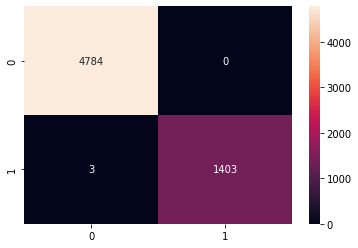

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 20s 306ms/step - loss: 0.0450 - accuracy: 0.9918
Validation Loss: 0.044972073286771774
Validation Accuracy: 0.9917556047439575 (Model Metric)
Validation Accuracy: 0.9917555771096024 (sklearn Metric)
Validation Precision: 0.9803063457330415
Validation Recall: 0.9824561403508771
Validation F1-score: 0.9813800657174151


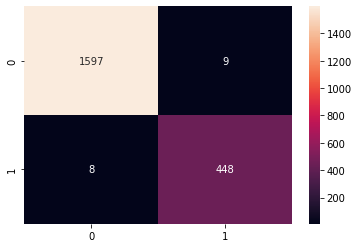

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 43s 615ms/step - loss: 0.0308 - accuracy: 0.9947
Test Loss: 0.03078962117433548
Test Accuracy: 0.9946653842926025 (Model Metric)
Test Accuracy: 0.9946653734238603 (sklearn Metric)
Test Precision: 1.0
Test Recall: 0.9756637168141593
Test F1-score: 0.9876819708846585


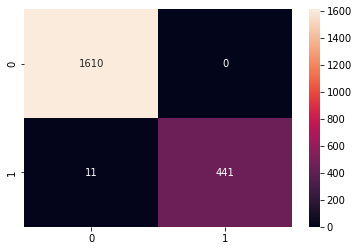

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')